In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
from scipy.spatial.distance import cdist

## import the library below:

In [7]:
from PyEyeSim import EyeData


In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Step 1. 

#### read .csv file containing fixations for all stimuli and participants in a single file with pandas

In [12]:
Path='C:/Users/nickp/Documents/Courses/P1&P2/EyeMovementDat/'
FilePath=Path+'test.csv'
FixData=pd.read_csv(FilePath, sep=',',header=0)
print(np.shape(FixData))


(3, 10)


In [13]:
FixData

,id,task,sid,stimfile,trialid,start_ms,end_ms,duration_ms,orig_fix_x,orig_fix_y
0,0,T1_Syllables,1003,s7_stimuli_t1.jpg,12,328491.191,328683.159,195,150,150
1,1,T1_Syllables,1003,s7_stimuli_t1.jpg,12,328747.177,328995.193,250,155,150
2,2,T1_Syllables,1003,s7_stimuli_t1.jpg,12,328491.191,328683.159,255,140,150


## Step 2

#### pass pandas dataframe, to pyeyesim, providing information on screen size in pixels

(we run the pipeline here because this nb is to demonstrate the inference pipeline not the descriptives)


dataset size:  (3, 10)
presentation size:  x= 1680 pixels y= 1050  pixels
presentation size:  x= 1680 pixels y= 1050  pixels
Stimulus  not found !!, provide column as Stimulus =YourColumn , default:  Stimulus
subjectID  not found !!, provide column as subjectID =YourColumn , default:  subjectID
mean_x  not found !!, provide column as mean_x =YourColumn , default:  mean_x
mean_y  not found !!, provide column as mean_y =YourColumn , default:  mean_y
info found for 1 subjects, and 1 stimuli
sizecorrect =  True ; If stimulus not full screen, assume central presentation, use correction
s7_stimuli_t1.jpg
stimulus size in y is full screen
stimulus size in x full screen
 
stimuli loaded succesfully, access as self.images
run descriptive analysis
Data for  1 observers and  1  stimuli.
Mean fixation number:  3.0  +/-  0.0
fixation duration not asked for
Num of trials with zero fixations: 0
Num valid trials  1
Mean X location:  148.3  +/-  0.0  pixels
Mean Y location:  150.0  +/-  0.0  pixels
Mea

c:\Users\nickp\.conda\envs\eyesim\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\nickp\.conda\envs\eyesim\Lib\site-packages\numpy\core\_methods.py:195: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
c:\Users\nickp\.conda\envs\eyesim\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\nickp\.conda\envs\eyesim\Lib\site-packages\numpy\core\_methods.py:195: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


(array(['s7_stimuli_t1.jpg'], dtype=object), array([1003], dtype=int64))

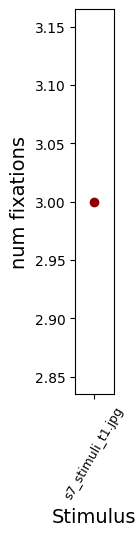

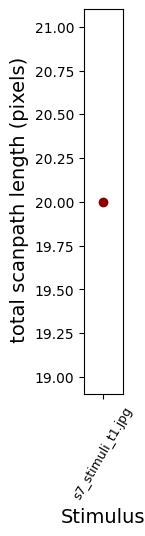

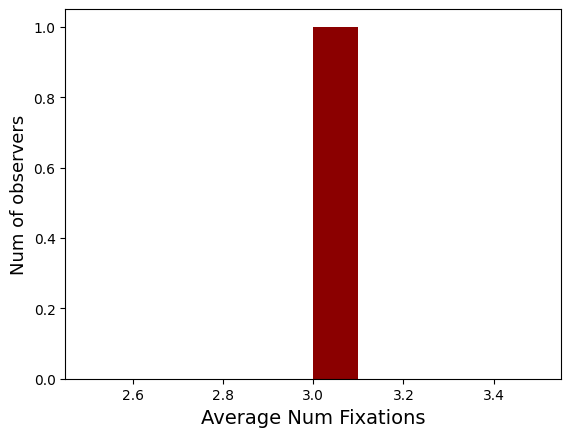

In [14]:

sizeX,sizeY=1680,1050


DyslexiaDat=EyeData(FixData,sizeX,sizeY)
DyslexiaDat.DataInfo(FixDuration='length',Stimulus='stimfile',subjectID='sid',StimPath=Path+'images/',StimExt='.jpg', mean_x='orig_fix_x', mean_y='orig_fix_y')
DyslexiaDat.RunDescriptiveFix(Visual=1)


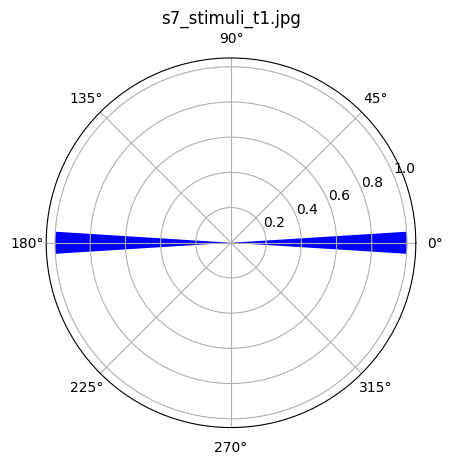

In [25]:
DyslexiaDat.Vis_Saccade_Angles(DyslexiaDat.stimuli[0],color='b',binsize=10)

In [125]:
SaccadeObj=DyslexiaDat.GetSaccades()
Saccades=DyslexiaDat.SaccadeSel(SaccadeObj,nHor=2,InferS=False)
Saccades

array([[[[array([], dtype=float64), array([], dtype=float64)],
         [array([], dtype=float64), array([], dtype=float64)]]]],
      dtype=object)

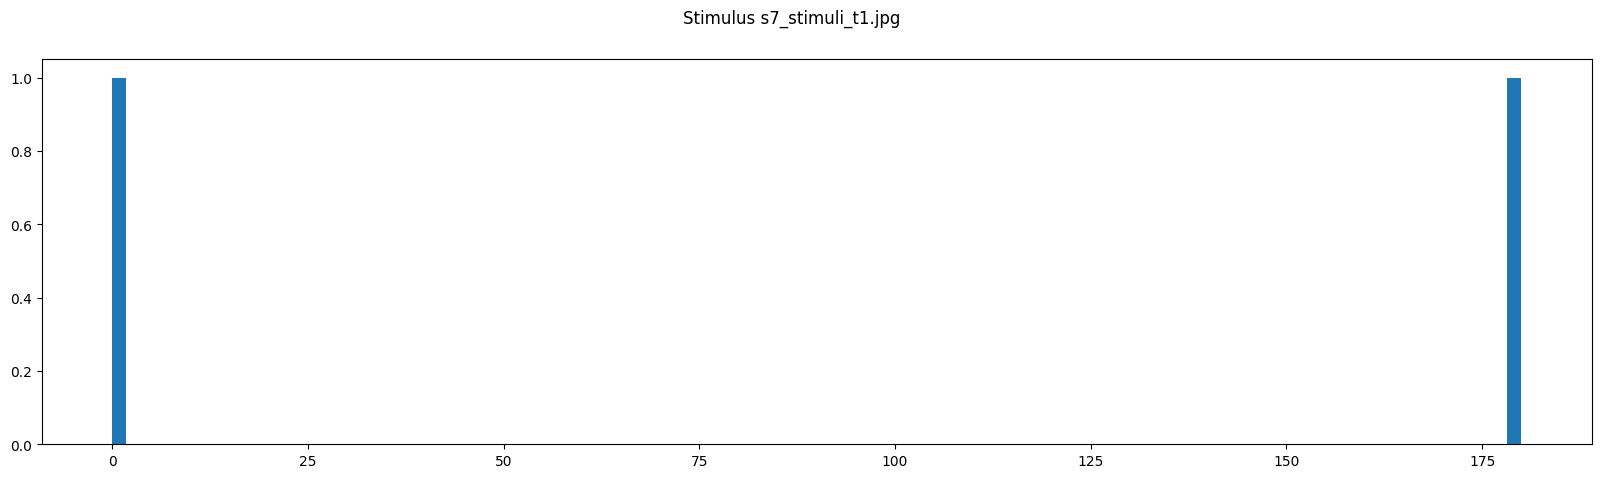

In [121]:
for i,stim in enumerate(DyslexiaDat.stimuli):
    stim_saccades = Saccades[:,i,:,:]

    stim_saccades = np.array(stim_saccades)
    fig, ax = plt.subplots(1, 1, figsize=(20, 5))
    fig.suptitle(f'Stimulus {stim}')

    angles = []
    for subj in stim_saccades:
        for h in range(subj.shape[0]):
            for v in range(subj.shape[1]):
                for val in subj[h,v]:
                    angles.append(val)
    ax.hist(angles, bins=100)